In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_bp.xlsx to X_bp.xlsx


In [ ]:
X_bp=pd.read_excel("X_bp.xlsx")
X_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_nup.xlsx to X_nup.xlsx


In [ ]:
X_nup=pd.read_excel("X_nup.xlsx")
X_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [ ]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [ ]:
X_bp.rename(columns={X_bp.columns[0]:'id'}, inplace=True)
X_nup.rename(columns={X_nup.columns[0]:'id'},inplace=True)
d_kompozit = pd.merge(X_bp, X_nup, how="inner", on="id")
d_kompozit.drop('id', axis=1, inplace=True)

In [ ]:
d_kompozit.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [ ]:
d_kompozit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
d_kompozit.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
import seaborn as sns

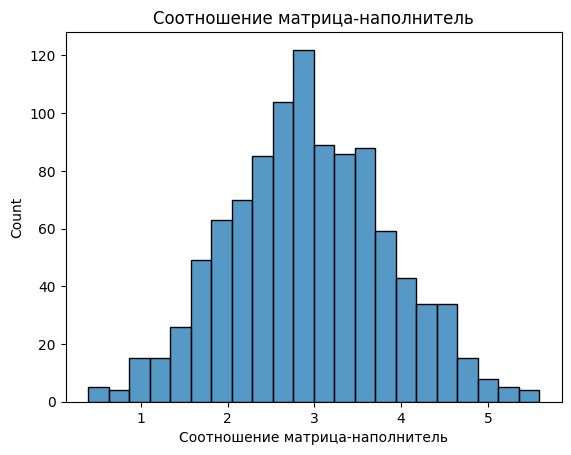

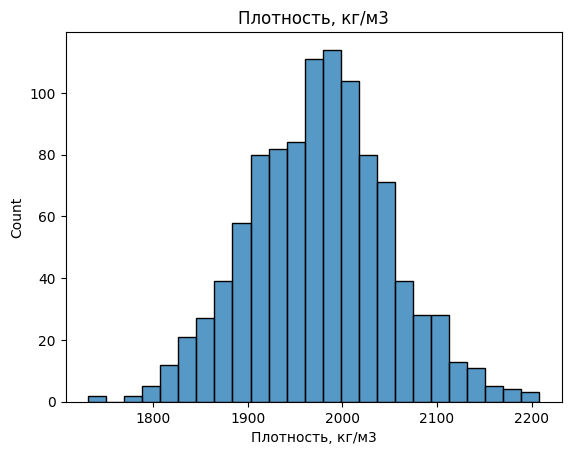

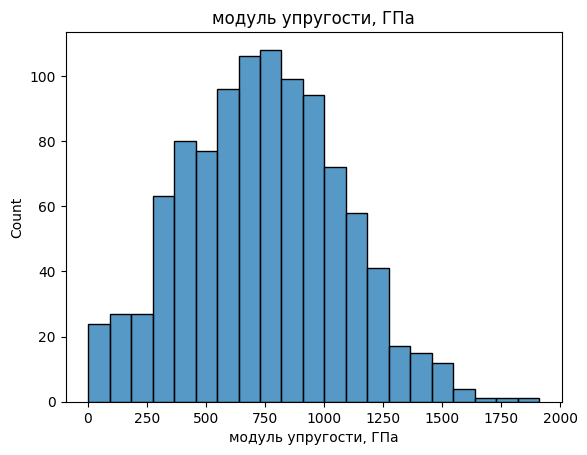

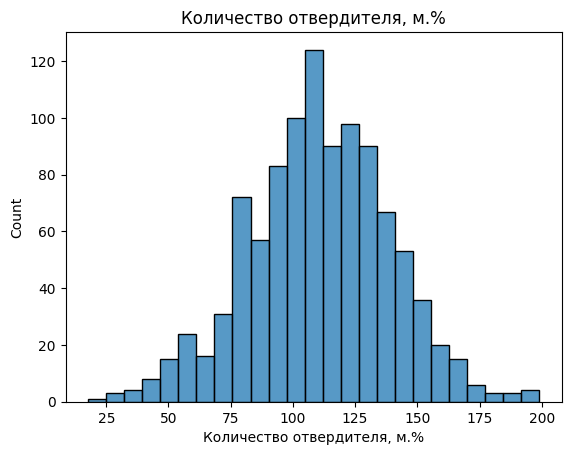

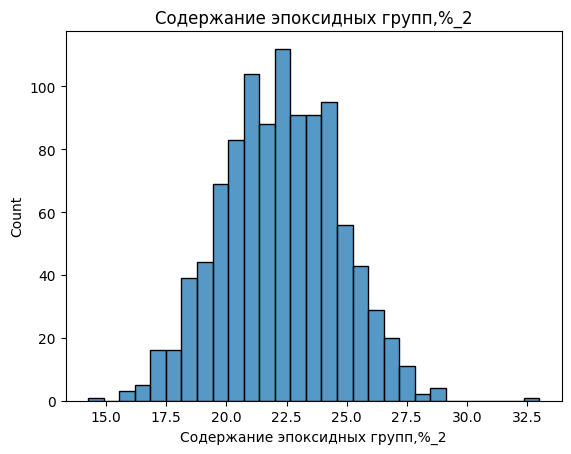

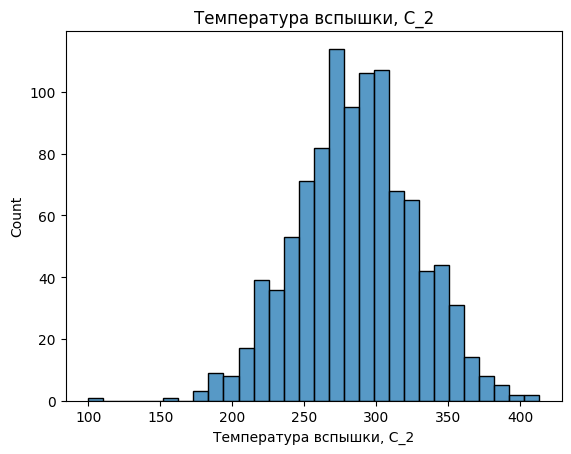

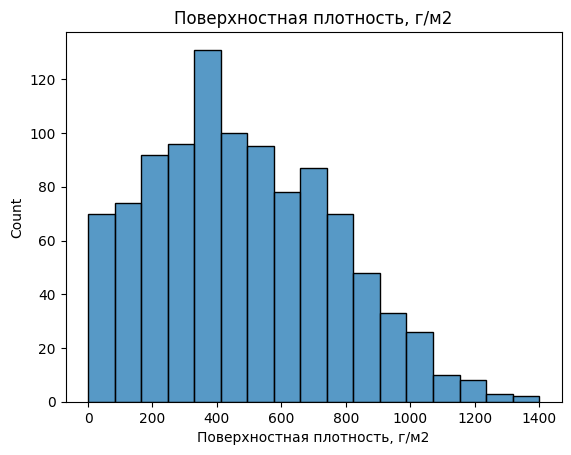

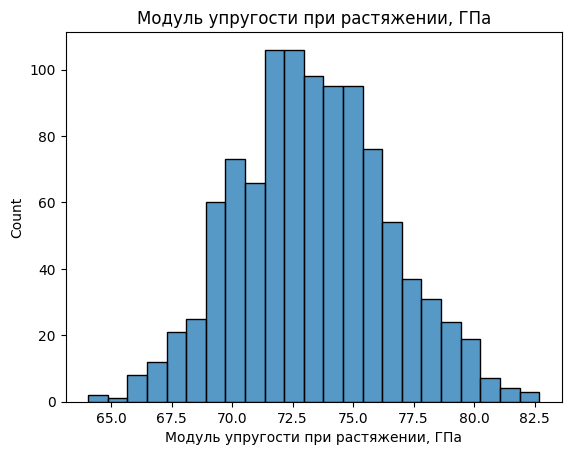

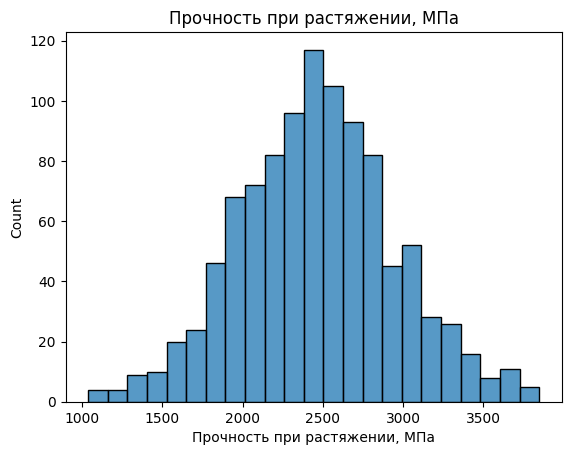

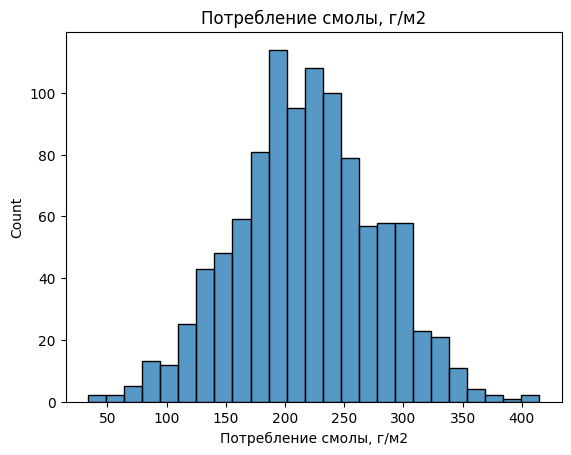

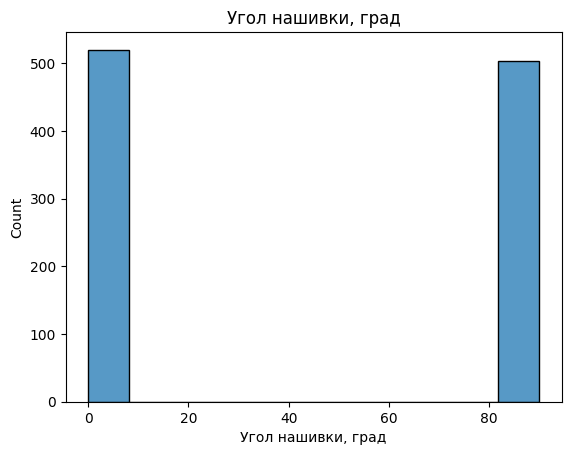

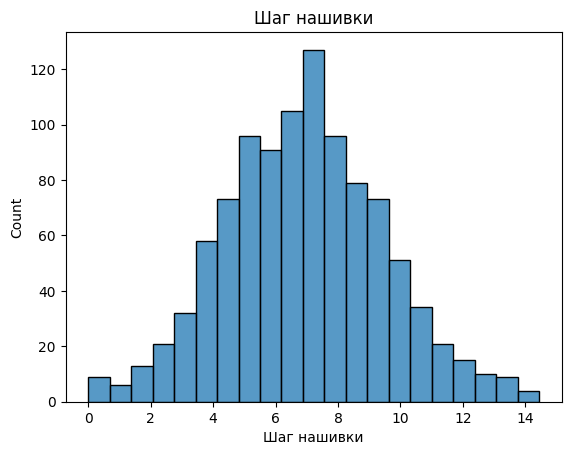

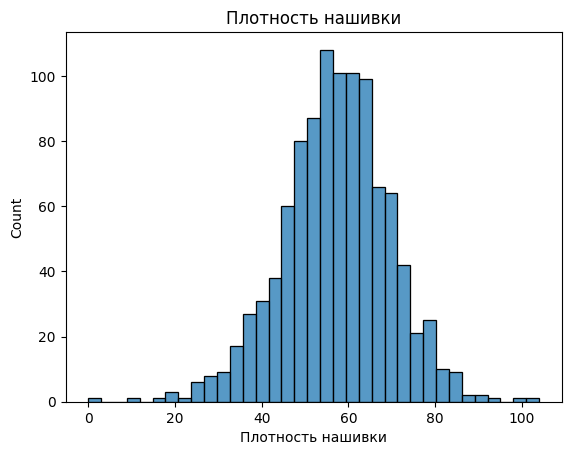

In [ ]:
for column in d_kompozit.columns:
    plt.figure()
    sns.histplot(d_kompozit[column])
    plt.title(column)

In [ ]:
d_kompozit.corr() #Коэффициент корреляции для всех попарных комбинаций

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


<Axes: >

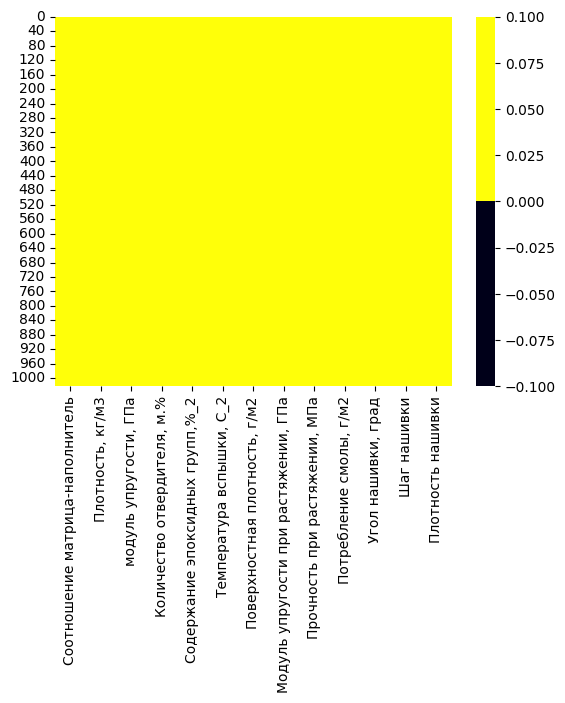

In [ ]:
cols = d_kompozit.columns #Тепловая карта пропущенных данных
# определяем цвета 
# желтый - пропущенные данные, черный - не пропущенные
colours = ['#000019', '#ffff09'] 
sns.heatmap(d_kompozit[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in d_kompozit.columns:
    pct_missing = np.mean(d_kompozit[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки, град - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


<Axes: >

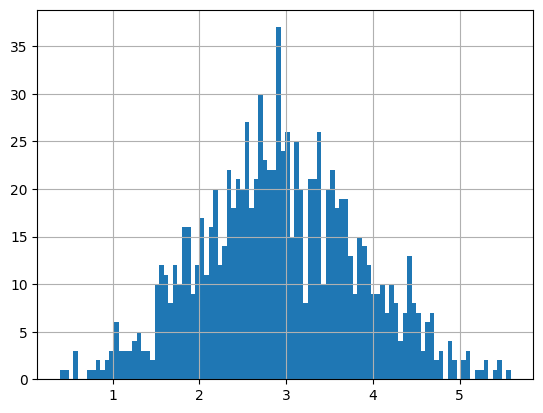

In [ ]:
d_kompozit['Соотношение матрица-наполнитель'].hist(bins=100)

<Axes: >

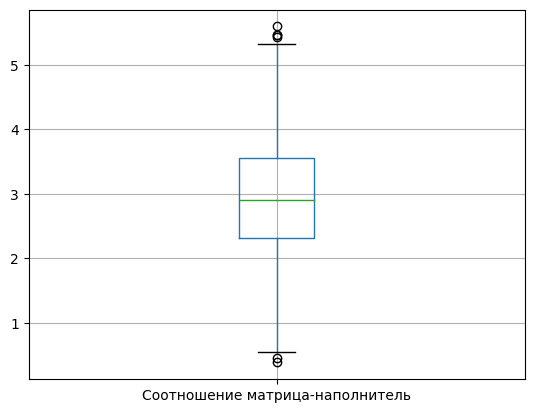

In [ ]:
d_kompozit.boxplot(column=['Соотношение матрица-наполнитель'])

In [ ]:
d_kompozit['Соотношение матрица-наполнитель'].describe()

count    1023.000000
mean        2.930366
std         0.913222
min         0.389403
25%         2.317887
50%         2.906878
75%         3.552660
max         5.591742
Name: Соотношение матрица-наполнитель, dtype: float64

<Axes: >

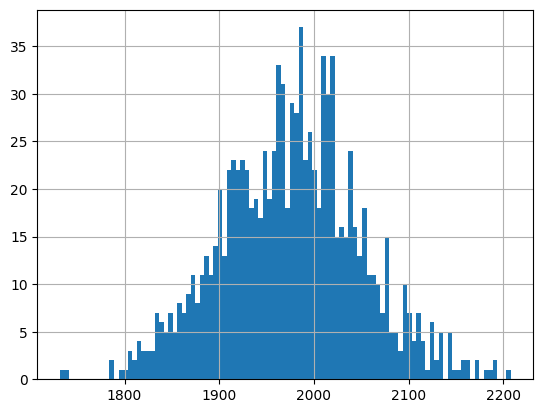

In [ ]:
d_kompozit['Плотность, кг/м3'].hist(bins=100)

<Axes: >

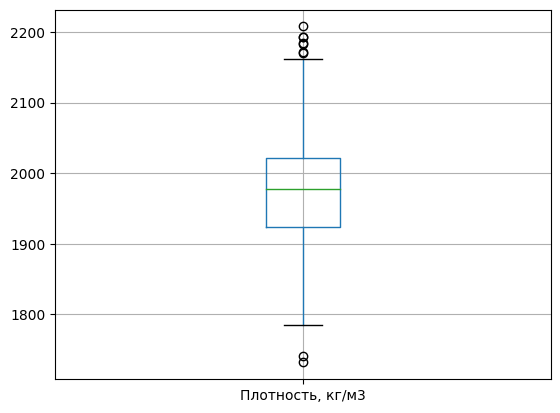

In [ ]:
d_kompozit.boxplot(column=['Плотность, кг/м3'])

In [ ]:
d_kompozit['Плотность, кг/м3'].describe()

count    1023.000000
mean     1975.734888
std        73.729231
min      1731.764635
25%      1924.155467
50%      1977.621657
75%      2021.374375
max      2207.773481
Name: Плотность, кг/м3, dtype: float64

<Axes: >

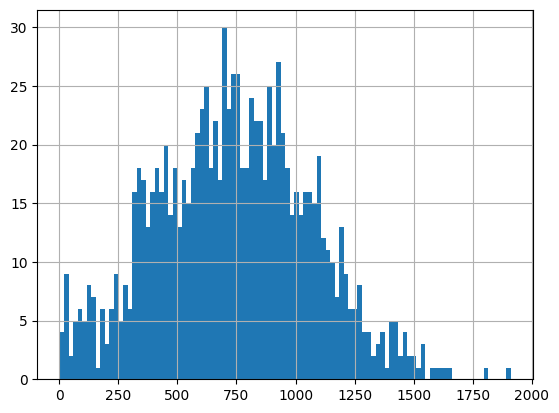

In [ ]:
d_kompozit['модуль упругости, ГПа'].hist(bins=100)

<Axes: >

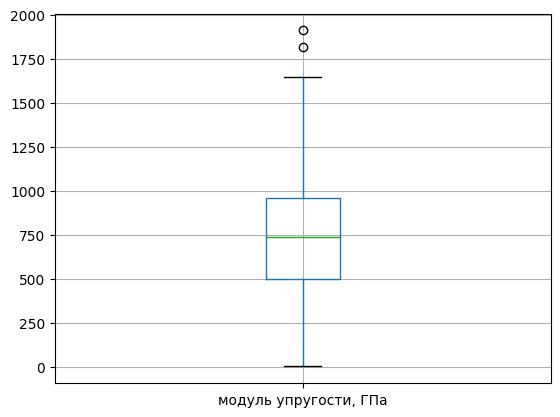

In [ ]:
d_kompozit.boxplot(column=['модуль упругости, ГПа'])

In [ ]:
d_kompozit['модуль упругости, ГПа'].describe()

count    1023.000000
mean      739.923233
std       330.231581
min         2.436909
25%       500.047452
50%       739.664328
75%       961.812526
max      1911.536477
Name: модуль упругости, ГПа, dtype: float64

<Axes: >

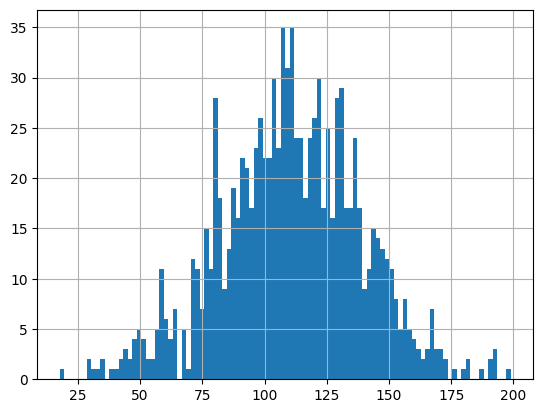

In [ ]:
d_kompozit['Количество отвердителя, м.%'].hist(bins=100)

<Axes: >

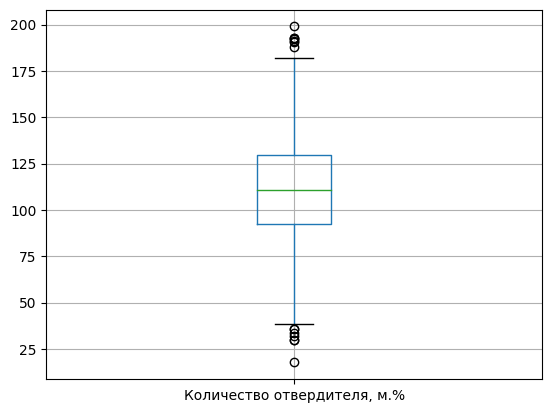

In [ ]:
d_kompozit.boxplot(column=['Количество отвердителя, м.%'])

In [ ]:
d_kompozit['Количество отвердителя, м.%'].describe()

count    1023.000000
mean      110.570769
std        28.295911
min        17.740275
25%        92.443497
50%       110.564840
75%       129.730366
max       198.953207
Name: Количество отвердителя, м.%, dtype: float64

<Axes: >

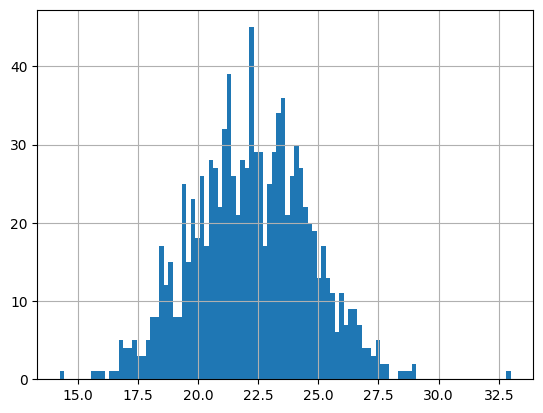

In [ ]:
d_kompozit['Содержание эпоксидных групп,%_2'].hist(bins=100)

<Axes: >

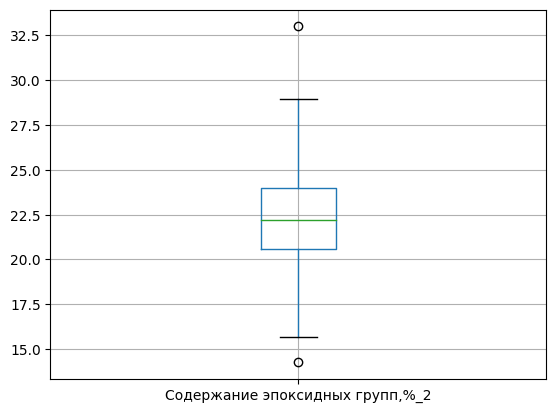

In [ ]:
d_kompozit.boxplot(column=['Содержание эпоксидных групп,%_2'])

In [ ]:
d_kompozit['Содержание эпоксидных групп,%_2'].describe()

count    1023.000000
mean       22.244390
std         2.406301
min        14.254985
25%        20.608034
50%        22.230744
75%        23.961934
max        33.000000
Name: Содержание эпоксидных групп,%_2, dtype: float64

<Axes: >

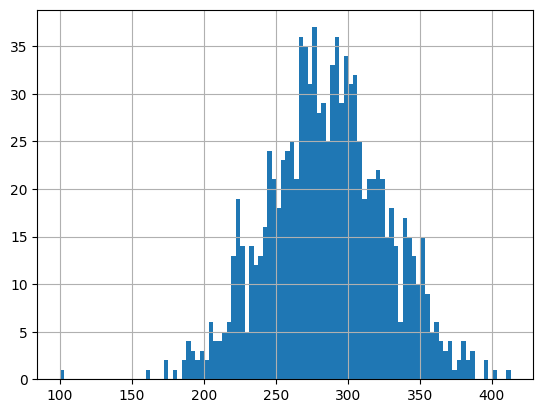

In [ ]:
d_kompozit['Температура вспышки, С_2'].hist(bins=100)

<Axes: >

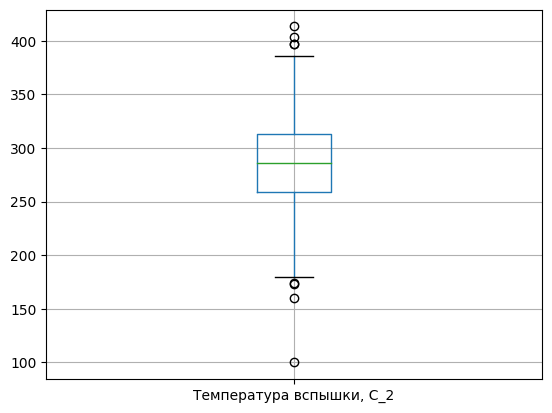

In [ ]:
d_kompozit.boxplot(column=['Температура вспышки, С_2'])

In [ ]:
d_kompozit['Температура вспышки, С_2'].describe()

count    1023.000000
mean      285.882151
std        40.943260
min       100.000000
25%       259.066528
50%       285.896812
75%       313.002106
max       413.273418
Name: Температура вспышки, С_2, dtype: float64

<Axes: >

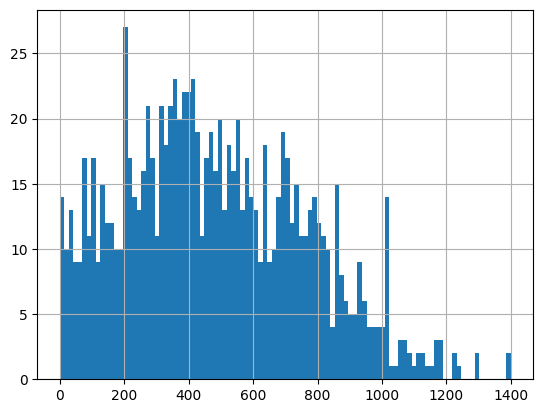

In [ ]:
d_kompozit['Поверхностная плотность, г/м2'].hist(bins=100)

<Axes: >

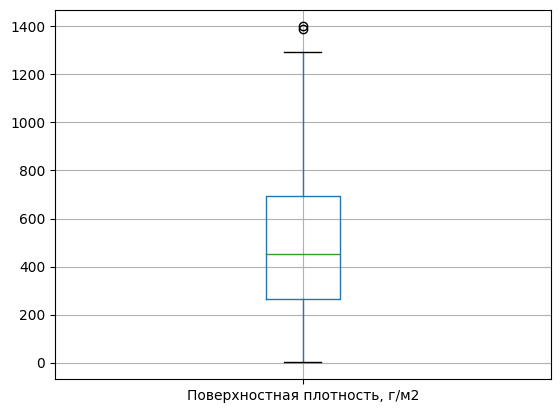

In [ ]:
d_kompozit.boxplot(column=['Поверхностная плотность, г/м2'])

In [ ]:
d_kompozit['Поверхностная плотность, г/м2'].describe()

count    1023.000000
mean      482.731833
std       281.314690
min         0.603740
25%       266.816645
50%       451.864365
75%       693.225017
max      1399.542362
Name: Поверхностная плотность, г/м2, dtype: float64

<Axes: >

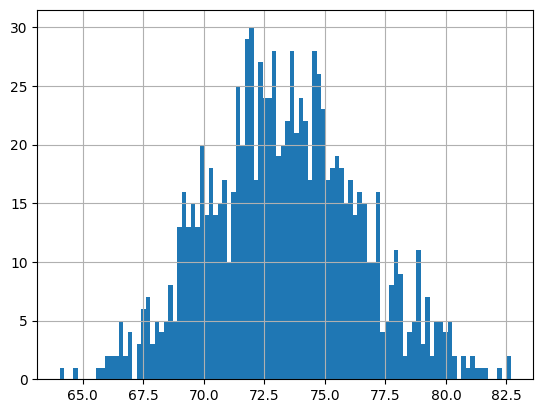

In [ ]:
d_kompozit['Модуль упругости при растяжении, ГПа'].hist(bins=100)

<Axes: >

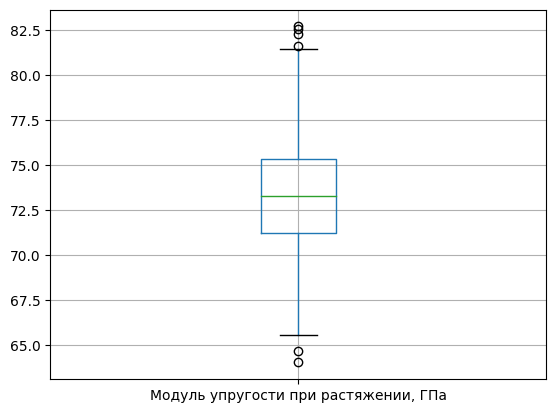

In [ ]:
d_kompozit.boxplot(column=['Модуль упругости при растяжении, ГПа'])

In [ ]:
d_kompozit['Модуль упругости при растяжении, ГПа'].describe()

count    1023.000000
mean       73.328571
std         3.118983
min        64.054061
25%        71.245018
50%        73.268805
75%        75.356612
max        82.682051
Name: Модуль упругости при растяжении, ГПа, dtype: float64

<Axes: >

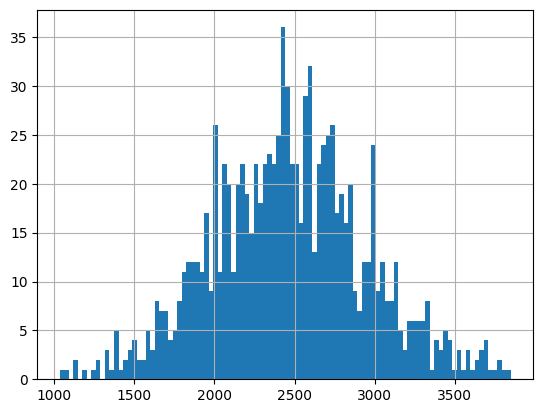

In [ ]:
d_kompozit['Прочность при растяжении, МПа'].hist(bins=100)

<Axes: >

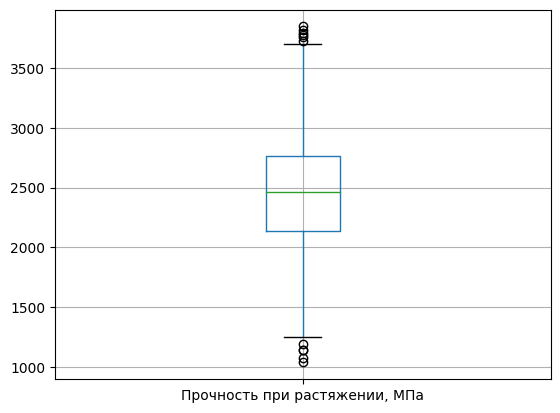

In [ ]:
d_kompozit.boxplot(column=['Прочность при растяжении, МПа'])

In [ ]:
d_kompozit['Прочность при растяжении, МПа'].describe()

count    1023.000000
mean     2466.922843
std       485.628006
min      1036.856605
25%      2135.850448
50%      2459.524526
75%      2767.193119
max      3848.436732
Name: Прочность при растяжении, МПа, dtype: float64

<Axes: >

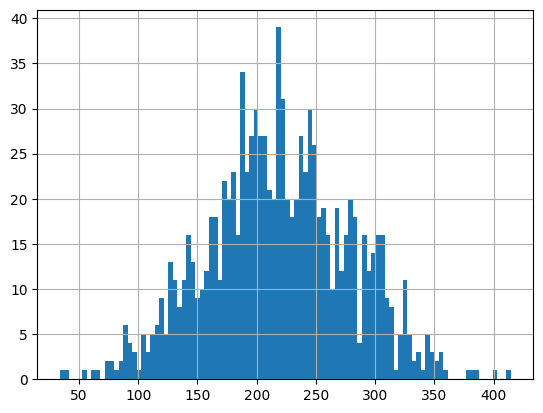

In [ ]:
d_kompozit['Потребление смолы, г/м2'].hist(bins=100)

In [ ]:
d_kompozit['Потребление смолы, г/м2'].describe()

count    1023.000000
mean      218.423144
std        59.735931
min        33.803026
25%       179.627520
50%       219.198882
75%       257.481724
max       414.590628
Name: Потребление смолы, г/м2, dtype: float64

<Axes: >

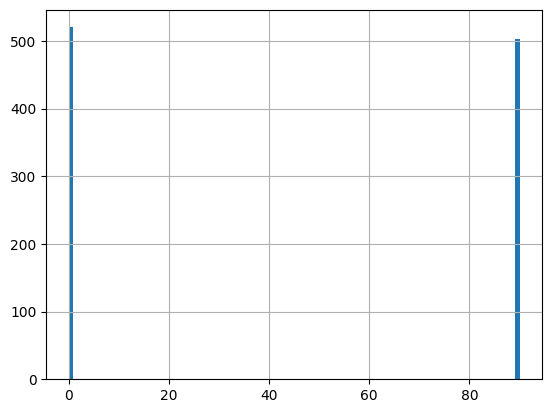

In [ ]:
d_kompozit['Угол нашивки, град'].hist(bins=100)

<Axes: >

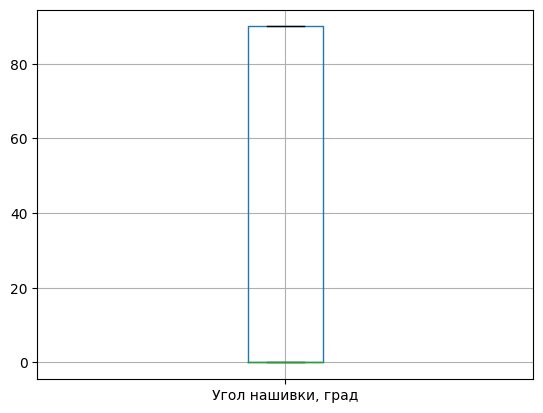

In [ ]:
d_kompozit.boxplot(column=['Угол нашивки, град'])

In [ ]:
d_kompozit['Угол нашивки, град'].describe()

count    1023.000000
mean       44.252199
std        45.015793
min         0.000000
25%         0.000000
50%         0.000000
75%        90.000000
max        90.000000
Name: Угол нашивки, град, dtype: float64

<Axes: >

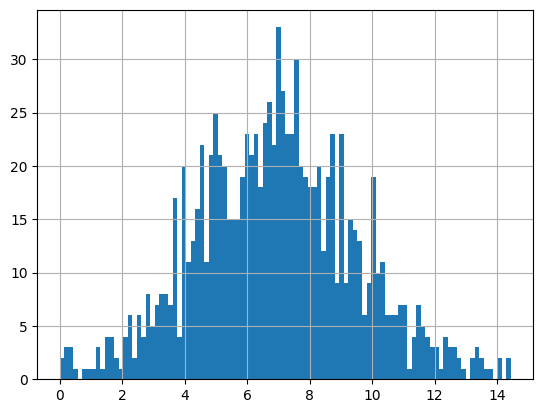

In [ ]:
d_kompozit['Шаг нашивки'].hist(bins=100)

<Axes: >

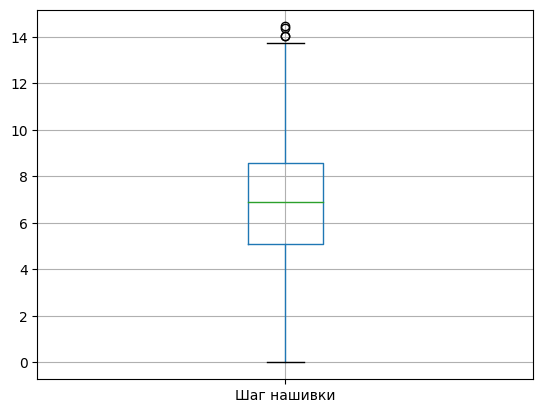

In [ ]:
d_kompozit.boxplot(column=['Шаг нашивки'])

In [ ]:
d_kompozit['Шаг нашивки'].describe()

count    1023.000000
mean        6.899222
std         2.563467
min         0.000000
25%         5.080033
50%         6.916144
75%         8.586293
max        14.440522
Name: Шаг нашивки, dtype: float64

<Axes: >

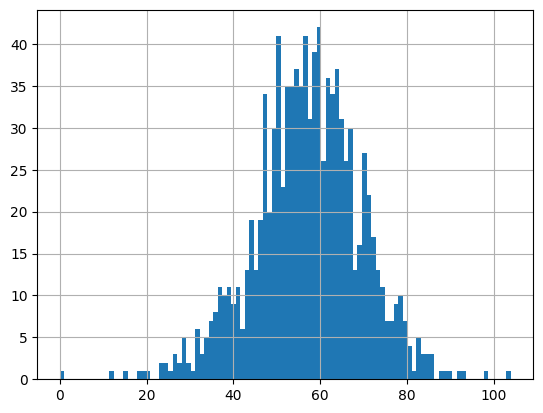

In [ ]:
d_kompozit['Плотность нашивки'].hist(bins=100)

<Axes: >

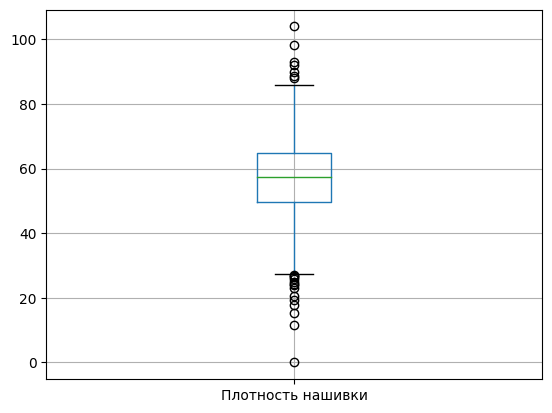

In [ ]:
d_kompozit.boxplot(column=['Плотность нашивки'])

In [ ]:
import scipy.stats as stats

In [ ]:
z = np.abs(stats.zscore(d_kompozit)) #Метод z-оценки

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean1 = d_kompozit[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean1.shape

(999, 13)

In [ ]:
data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    int64  
 11  Шаг нашивки       

In [ ]:
data_clean1.head

<bound method NDFrame.head of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.

In [ ]:
data_clean1.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.004226,0.044539,-0.006647,0.023488,-0.010611,-0.012322,-0.009516,0.023719,0.062625,-0.041373,0.043592,0.008647
"Плотность, кг/м3",0.004226,1.000000,-0.004100,-0.041654,-0.006227,-0.016798,0.045103,-0.015994,-0.081433,-0.016568,-0.056748,-0.047795,0.094173
"модуль упругости, ГПа",0.044539,-0.004100,1.000000,0.028704,-0.010568,0.030355,-0.004077,0.013793,0.038611,0.006803,-0.032095,-0.005988,0.068006
"Количество отвердителя, м.%",-0.006647,-0.041654,0.028704,1.000000,0.000105,0.085865,0.058037,-0.071357,-0.059566,0.021549,0.035273,-0.001002,0.012081
"Содержание эпоксидных групп,%_2",0.023488,-0.006227,-0.010568,0.000105,1.000000,-0.006679,-0.008788,0.067355,-0.025857,0.014607,0.012766,0.006837,-0.039438
"Температура вспышки, С_2",-0.010611,-0.016798,0.030355,0.085865,-0.006679,1.000000,0.028583,0.027321,-0.020762,0.051768,0.009038,0.020119,-0.007371
"Поверхностная плотность, г/м2",-0.012322,0.045103,-0.004077,0.058037,-0.008788,0.028583,1.000000,0.021924,-0.008100,0.003082,0.051710,0.043876,-0.029689
"Модуль упругости при растяжении, ГПа",-0.009516,-0.015994,0.013793,-0.071357,0.067355,0.027321,0.021924,1.000000,-0.003492,0.058045,0.023430,-0.029680,0.029278
"Прочность при растяжении, МПа",0.023719,-0.081433,0.038611,-0.059566,-0.025857,-0.020762,-0.008100,-0.003492,1.000000,0.028301,0.019031,-0.057403,0.029563
"Потребление смолы, г/м2",0.062625,-0.016568,0.006803,0.021549,0.014607,0.051768,0.003082,0.058045,0.028301,1.000000,-0.017138,0.013464,0.020144


In [ ]:
Q1 = d_kompozit.quantile(q=.25) #Метод межквартильного диапазона
Q3 = d_kompozit.quantile(q=.75)
IQR = Q3-Q1
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
data_clean = (d_kompozit < max) | (d_kompozit > min)
data_clean.shape

(1023, 13)

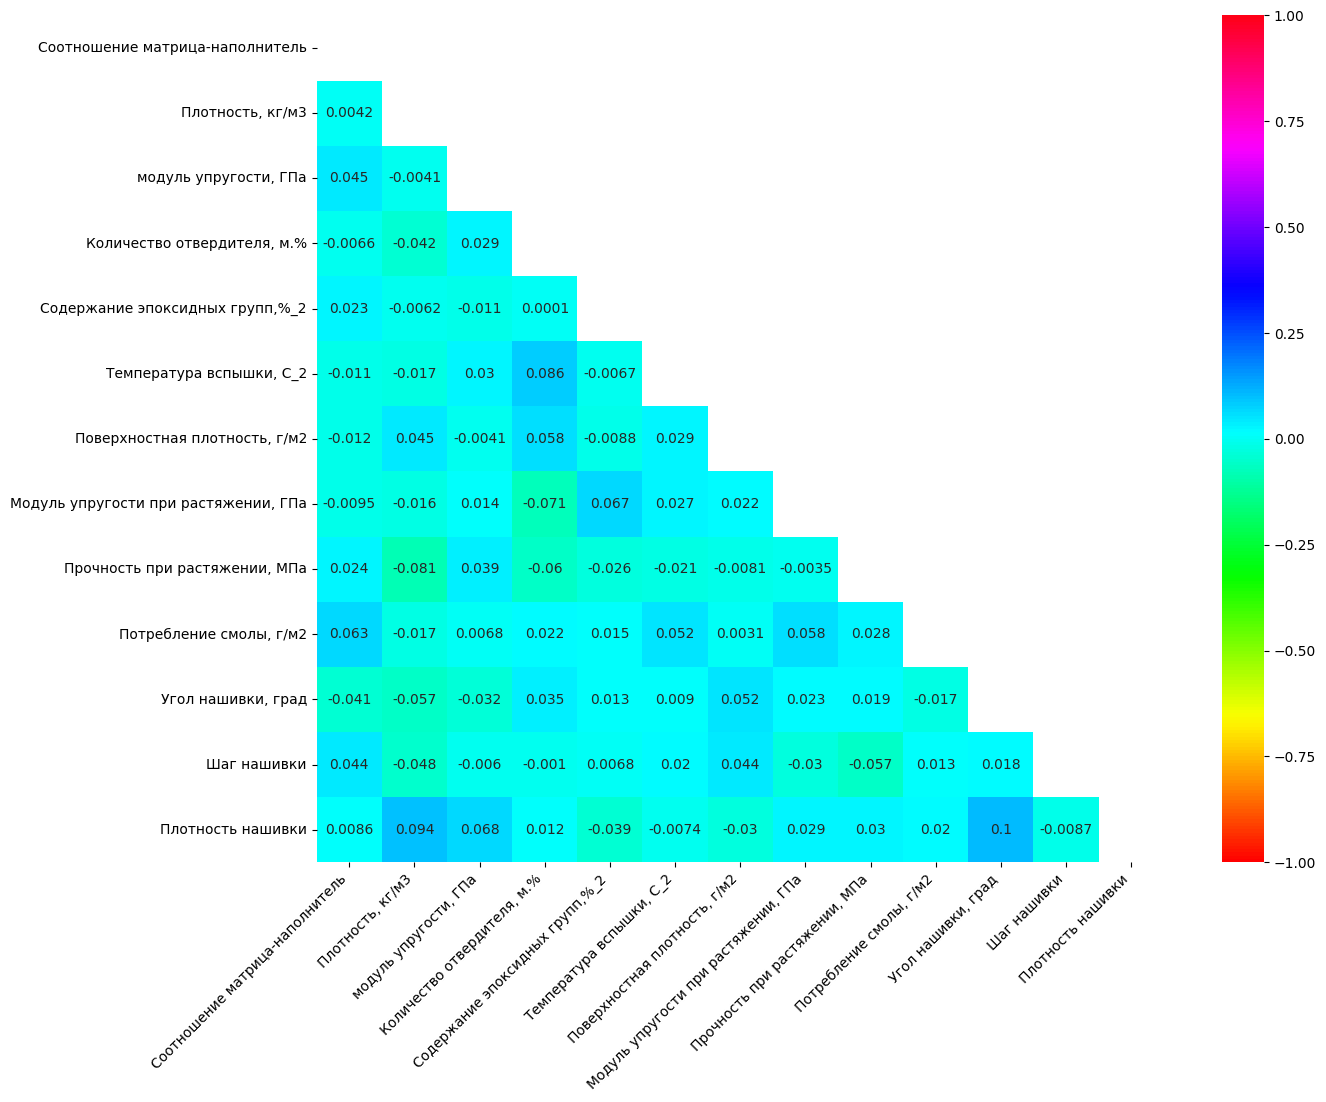

In [ ]:
mask = np.triu(data_clean1.corr())
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(data_clean1.corr(), mask=mask, annot=True, square=True, vmin=-1, vmax=1, center= 0, cmap='hsv')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = data_clean1.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y = data_clean1[['Модуль упругости при растяжении, ГПа']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

NameError: ignored

In [ ]:
print ('Training Set_1: %d rows\nTest Set_1    : %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set_1: 699 rows
Test Set_1    : 300 rows


In [ ]:
X1 = data_clean1.drop(['Прочность при растяжении, МПа'], axis=1)
y1 = data_clean1[['Прочность при растяжении, МПа']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

In [ ]:
print ('Training Set_2: %d rows\nTest Set_2    : %d rows' % (X1_train.shape[0], X1_test.shape[0]))

Training Set_2: 699 rows
Test Set_2    : 300 rows


Нормализация

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = preprocessing.MinMaxScaler()
columns = data_clean1.columns
data_norm = scaler.fit_transform(np.array(data_clean1))
data_norm = pd.DataFrame(data_norm, columns=columns)
data_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.682789


In [ ]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    float64
 11  Шаг нашивки        

Стандартизация

In [ ]:
data_st = (data_clean1-data_clean1.mean ())/data_clean1.std()

#view new data frame
data_st

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,-1.188294,0.747435,0.000875,-2.186985,0.635675,-0.033521,-0.970727,-1.066933,1.103190,0.030728,-0.992520,-1.137438,0.229222
3,-1.188294,0.747435,0.000875,0.651199,-0.412580,0.348696,-0.970727,-1.066933,1.103190,0.030728,-0.992520,-0.746665,-0.867890
4,-0.182426,0.747435,0.044409,0.035421,0.014209,-0.033521,-0.970727,-1.066933,1.103190,0.030728,-0.992520,-0.746665,-0.023957
5,-0.186181,0.336276,0.029148,0.035421,0.014209,-0.033521,-0.970727,-1.066933,1.103190,0.030728,-0.992520,-0.746665,0.229222
6,-0.404365,-0.897203,0.209228,0.035421,0.014209,-0.033521,-0.970727,-1.066933,1.103190,0.030728,-0.992520,-0.746665,1.073154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.732552,-0.320375,0.532321,-0.857990,-0.885029,0.964198,-0.973613,-0.070244,-0.162382,-1.580990,1.006528,0.846278,-0.866221
1019,0.557727,1.022763,-0.896487,1.261300,-1.104525,-0.788782,-0.464152,-0.125104,-0.217944,-1.704468,1.006528,1.428231,-0.298169
1020,0.377921,-0.042363,-0.981631,-0.012236,0.722680,-0.932688,0.938527,0.459669,0.406909,0.312492,1.006528,-1.074464,0.873116
1021,0.845264,1.251787,0.009234,1.096613,-1.252465,-0.253033,0.583160,0.236649,-0.814217,-0.357370,1.006528,-0.233500,0.082469


In [ ]:
data_st. std()

Соотношение матрица-наполнитель         1.0
Плотность, кг/м3                        1.0
модуль упругости, ГПа                   1.0
Количество отвердителя, м.%             1.0
Содержание эпоксидных групп,%_2         1.0
Температура вспышки, С_2                1.0
Поверхностная плотность, г/м2           1.0
Модуль упругости при растяжении, ГПа    1.0
Прочность при растяжении, МПа           1.0
Потребление смолы, г/м2                 1.0
Угол нашивки, град                      1.0
Шаг нашивки                             1.0
Плотность нашивки                       1.0
dtype: float64

Масштабирование

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
for col in data_clean1.columns:
    print(f'{col} range :', round(np.min(data_clean1[col]),2), "-", round(np.max(data_clean1[col]),2))

Соотношение матрица-наполнитель range : 0.39 - 5.59
Плотность, кг/м3 range : 1784.48 - 2192.74
модуль упругости, ГПа range : 2.44 - 1649.42
Количество отвердителя, м.% range : 29.96 - 192.85
Содержание эпоксидных групп,%_2 range : 15.7 - 28.96
Температура вспышки, С_2 range : 173.48 - 403.65
Поверхностная плотность, г/м2 range : 0.6 - 1291.34
Модуль упругости при растяжении, ГПа range : 64.05 - 82.53
Прочность при растяжении, МПа range : 1036.86 - 3848.44
Потребление смолы, г/м2 range : 41.05 - 386.9
Угол нашивки, град range : 0 - 90
Шаг нашивки range : 0.04 - 14.44
Плотность нашивки range : 20.57 - 92.96


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[1]

array([-0.1946081 , -1.26730842,  1.79772789, -1.47213923,  1.71785084,
        0.86769805, -1.27287063,  0.47070308,  0.85687844,  0.99003534,
        0.34529959, -0.11128465])

In [ ]:
X_test_scaled[1]

array([-0.43691428, -0.89251511,  0.4301595 ,  1.47986903, -0.08177796,
        0.26405231,  0.1026084 , -1.27332197,  0.18514752,  0.99003534,
       -0.69798885,  0.76171052])

In [ ]:
y_test.shape

(300, 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train) 
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
X1_test_scaled[1]

array([-0.43691428, -0.89251511,  0.4301595 ,  1.47986903, -0.08177796,
        0.26405231,  0.1026084 , -1.59441815,  0.18514752,  0.99003534,
       -0.69798885,  0.76171052])

In [ ]:
y1_test.shape

(300, 1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([[72.55629863],
       [73.41661441],
       [73.98735065],
       [73.90502616],
       [73.13653062],
       [72.86928243],
       [72.57227837],
       [73.00906193],
       [74.54329447],
       [73.86725764],
       [73.59180698],
       [72.62663122],
       [74.01616266],
       [73.32274525],
       [73.25046758],
       [72.66288006],
       [72.6190439 ],
       [73.74154874],
       [73.5410158 ],
       [73.34445923],
       [73.05220288],
       [73.79737453],
       [72.74925958],
       [73.77612066],
       [73.11699403],
       [74.13519662],
       [73.75328875],
       [74.25423424],
       [73.24584383],
       [72.80320331],
       [73.49264897],
       [74.33262108],
       [74.26420066],
       [73.19161025],
       [73.15702454],
       [73.42170326],
       [72.87326445],
       [73.41592903],
       [74.09129497],
       [73.41414924],
       [73.22382074],
       [73.89219162],
       [72.86745446],
       [73.19128052],
       [73.7102079 ],
       [73

In [ ]:
X_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
469,2.783675,1990.290555,331.404635,127.256086,20.091445,230.228199,577.408889,3249.696766,176.945878,0,8.609213,43.814552
815,2.538890,1908.393790,877.243968,152.503454,21.992954,295.529582,508.461215,1849.135511,227.779358,90,5.030449,66.586669
216,2.509977,1912.215145,1056.096385,87.198840,21.883152,252.331069,781.355358,2029.147825,206.428712,0,0.145034,54.138756
319,3.113267,2020.309903,383.006898,129.578767,20.798849,306.088190,777.962700,2160.777729,290.986464,0,5.364139,54.581442
760,2.488863,1920.085594,529.887068,126.053973,25.403925,321.184936,335.939917,2325.464987,215.511821,90,13.371039,49.177519
...,...,...,...,...,...,...,...,...,...,...,...,...
324,2.223337,1929.584696,444.184402,123.687384,20.520041,292.678638,469.436557,1908.203759,216.479290,0,9.511737,58.196301
417,2.827055,2003.317070,890.888308,154.966325,24.461730,307.797291,573.015309,2570.365126,232.183847,0,3.682171,82.011014
9,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,2000.000000,300.000000,0,7.000000,60.000000
161,4.534410,1965.866800,429.352589,128.402011,23.946868,269.226886,1013.405237,1768.487622,206.352177,0,5.510619,67.615311


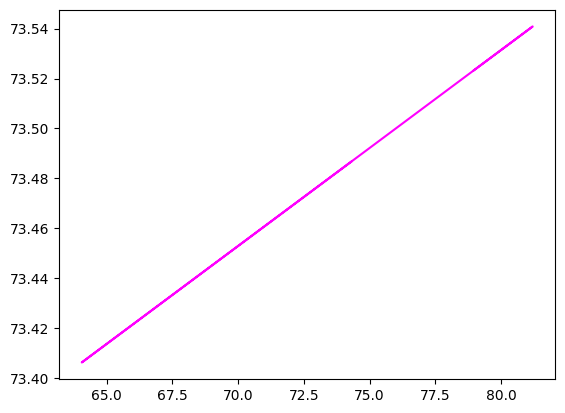

In [ ]:
z = np.polyfit(y_test.to_numpy().ravel(), pd.DataFrame(y_pred).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
import pickle
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('lr_model.pkl', 'rb'))

In [ ]:
model_load.predict(X_test)

array([[72.55629863],
       [73.41661441],
       [73.98735065],
       [73.90502616],
       [73.13653062],
       [72.86928243],
       [72.57227837],
       [73.00906193],
       [74.54329447],
       [73.86725764],
       [73.59180698],
       [72.62663122],
       [74.01616266],
       [73.32274525],
       [73.25046758],
       [72.66288006],
       [72.6190439 ],
       [73.74154874],
       [73.5410158 ],
       [73.34445923],
       [73.05220288],
       [73.79737453],
       [72.74925958],
       [73.77612066],
       [73.11699403],
       [74.13519662],
       [73.75328875],
       [74.25423424],
       [73.24584383],
       [72.80320331],
       [73.49264897],
       [74.33262108],
       [74.26420066],
       [73.19161025],
       [73.15702454],
       [73.42170326],
       [72.87326445],
       [73.41592903],
       [74.09129497],
       [73.41414924],
       [73.22382074],
       [73.89219162],
       [72.86745446],
       [73.19128052],
       [73.7102079 ],
       [73

LinearRegression() 

      linear_train  linear_test
R2        0.021467    -0.027603
mae       2.459194     2.522982
mse       9.487416     9.546971
rmse      3.080165     3.089817


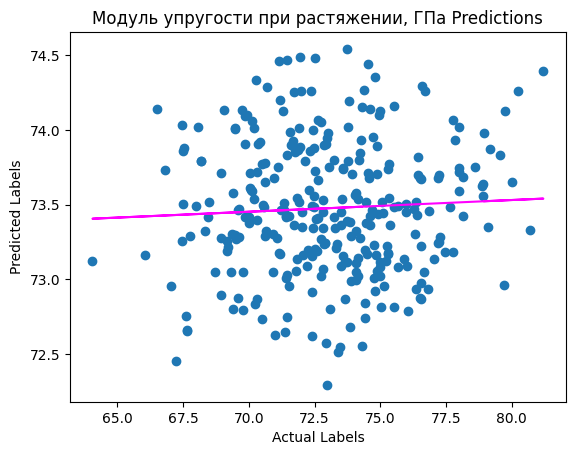

In [ ]:
linear = LinearRegression().fit(X_train_scaled, y_train) # Обучение На тренировочном наборе
print (linear, "\n")

#Оценка модели с использованием тестовых данных. Обученная модель запускается на X_test и извлекается метрика

y_pred = linear.predict(X_test_scaled)
y_train_pred = linear.predict(X_train_scaled)
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
print(ls)

#Сравнение предсказанного результата с фактическим
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Модуль упругости при растяжении, ГПа Predictions')

#Линия регресии
z = np.polyfit(y_test.to_numpy().ravel(), pd.DataFrame(y_pred).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

y_pred_1 = linear.predict(X_test_scaled)
linear_R2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Скорректированный коэффициент детерминации

In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   
    p = X.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y_test, y_pred, X_test)

-0.07056893259265751

Прочность при растяжении

LinearRegression() 

       linear_train    linear_test
R2         0.023781      -0.011552
mae      381.888430     380.397595
mse   232279.347113  227787.171261
rmse     481.953677     477.270543


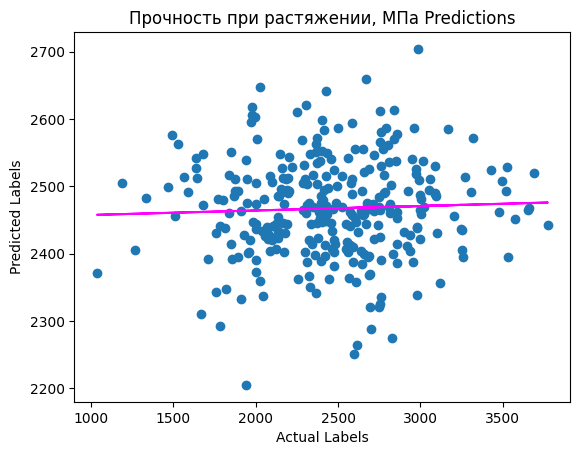

In [ ]:
linear = LinearRegression().fit(X1_train_scaled, y1_train) # Обучение На тренировочном наборе
print (linear, "\n")

#Оценка модели с использованием тестовых данных. Обученная модель запускается на X_test и извлекается метрика

y1_pred = linear.predict(X1_test_scaled)
y1_train_pred = linear.predict(X1_train_scaled)
ls =train_val(y1_train, y1_train_pred, y1_test, y1_pred, "linear")
print(ls)

#Сравнение предсказанного результата с фактическим
plt.scatter(y1_test, y1_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Прочность при растяжении, МПа Predictions')

#Линия регресии
z = np.polyfit(y1_test.to_numpy().ravel(), pd.DataFrame(y1_pred).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y1_test,p(y1_test), color='magenta')
plt.show()

y1_pred = linear.predict(X1_test_scaled)
linear_R2 = r2_score(y1_test, y1_pred)
linear_mae = mean_absolute_error(y1_test, y1_pred)
linear_mse = mean_squared_error(y1_test, y1_pred)
linear_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

Скорректированный коэффициент детерминации

In [ ]:
def adj_r2(y1_test, y1_pred, X1):
    r2 = r2_score(y1_test, y1_pred)
    n = X1.shape[0]   
    p = X1.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y1_test, y1_pred, X1_test)

-0.05384719111380276

Метод ближйших соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Прогнозирование значений на тестовых данных
y_pred = knn.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 11.913689834066206
MAE: 2.7735225664891776
R2: -0.2823483783385832


In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   
    p = X.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y_test, y_pred, X_test)

-0.335965732136712

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X1_train, y1_train)

# Прогнозирование значений на тестовых данных
y_pred = knn.predict(X1_test)

# Оценка качества модели
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

In [ ]:
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 227787.17126110577
MAE: 380.3975950693701
R2: -0.011552320567429275


In [ ]:
def adj_r2(y1_test, y1_pred, X1):
    r2 = r2_score(y1_test, y1_pred)
    n = X.shape[0]   
    p = X.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y1_test, y1_pred, X1_test)

-0.023863302156485355

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
                            # Создание объекта StandardScaler
scaler = StandardScaler()

#одномерный массив
y1_train = y1_train.ravel()
y1_test = y1_test.ravel()

# Нормализация данных
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Создание модели
rf_m = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_m, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X1_train_scaled, y1_train)

# Вывод наилучших параметров и оценки качества модели
rf1_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf1_best.score(X1_test_scaled, y1_test).round(3)}')

R2-score случайного леса: -0.03


In [ ]:
#Без нормализации R2=-0.028

In [ ]:
def adj_r2(y1_test, y1_pred, X1):
    r2 = r2_score(y1_test, y1_pred)
    n = X.shape[0]   
    p = X.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [ ]:
adj_r2(y1_test, y1_pred, X1_test)

-0.023863302156485355

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error,r2_score 

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Создание модели
sgd_m = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l1','l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal','invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_m, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train, y_train.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_m = grid.best_estimator_
print(f'R2-score SGD для модуля упругости при растяжении: {sgd_m.score(X_test, y_test).round(3)}')
print(mean_absolute_error(y_test, sgd_m.predict(X_test)))


R2-score SGD для модуля упругости при растяжении: -0.974
3.4894624896530013


In [ ]:
sgd_p = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_p, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X1_train, y1_train.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_p = grid.best_estimator_
print(f'R2-score SGD для модуля прочность при растяжении: {sgd_p.score(X1_test, y1_test).round(3)}')
print(mean_absolute_error(y1_test, sgd_p.predict(X1_test)))

R2-score SGD для модуля прочность при растяжении: -0.038
377.1557517984917


Нейросеть для рекомендации соотношения матица-наполнитель

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data_clean1.drop(['Соотношение матрица-наполнитель'], axis=1)
y = data_clean1[['Соотношение матрица-наполнитель']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: ignored

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
learning_rate = 0.001
momentum = 0
nesterov = True

In [ ]:
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2)

# Оценка качества модели на тестовых данных
mse, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on test set: {mse:.3f}")
print(f"Mean Absolute Error on test set: {mae:.3f}")

# Делаем предсказание
y_pred = model.predict(X_test)

# Считаем статистику
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим статистику
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Epoch 1/100
12/12 [==============================] - 1s 30ms/step - loss: 6.7558 - mae: 2.4289 - val_loss: 6.7048 - val_mae: 2.4408
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 6.6894 - mae: 2.4152 - val_loss: 6.6406 - val_mae: 2.4278
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 6.6248 - mae: 2.4019 - val_loss: 6.5778 - val_mae: 2.4149
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 6.5607 - mae: 2.3887 - val_loss: 6.5148 - val_mae: 2.4020
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 6.4967 - mae: 2.3754 - val_loss: 6.4545 - val_mae: 2.3895
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 6.4350 - mae: 2.3626 - val_loss: 6.3955 - val_mae: 2.3772
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 6.3753 - mae: 2.3502 - val_loss: 6.3359 - val_mae: 2.3647
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 6.3153 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM

In [ ]:
model.add(BatchNormalization())
model.add(LeakyReLU())

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
 batch_normalization (BatchN  (None, 1)                4         
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1)                 0         
                                                                 
Total params: 9,989
Trainable params: 9,987
Non-trainable params: 2
____________________________________________________

In [ ]:
X = data_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
y = data_norm[['Соотношение матрица-наполнитель']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='softmax', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=50, validation_split=0.2)

# Оценка качества модели на тестовых данных
mse, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on test set: {mse:.3f}")
print(f"Mean Absolute Error on test set: {mae:.3f}")

# Делаем предсказание
y_pred = model.predict(X_test)

# Считаем статистику
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим статистику
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Epoch 1/150
12/12 [==============================] - 1s 36ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 2/150
12/12 [==============================] - 0s 12ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 3/150
12/12 [==============================] - 0s 14ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 4/150
12/12 [==============================] - 0s 16ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 5/150
12/12 [==============================] - 0s 14ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 6/150
12/12 [==============================] - 0s 14ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 7/150
12/12 [==============================] - 0s 14ms/step - loss: 0.0315 - mae: 0.1438 - val_loss: 0.0275 - val_mae: 0.1343
Epoch 8/150
12/12 [==============================] - 0s 13ms/step - loss: 0.

In [ ]:
X = data_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
y = data_norm[['Соотношение матрица-наполнитель']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
learning_rate = 0.01
momentum = 0
nesterov = True

In [ ]:
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2)

# Оценка качества модели на тестовых данных
mse, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on test set: {mse:.3f}")
print(f"Mean Absolute Error on test set: {mae:.3f}")

# Делаем предсказание
y_pred = model.predict(X_test)

# Считаем статистику
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим статистику
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.0510 - mae: 0.1813 - val_loss: 0.0530 - val_mae: 0.1835
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0495 - mae: 0.1785 - val_loss: 0.0514 - val_mae: 0.1804
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0482 - mae: 0.1758 - val_loss: 0.0498 - val_mae: 0.1775
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0469 - mae: 0.1735 - val_loss: 0.0484 - val_mae: 0.1749
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1714 - val_loss: 0.0469 - val_mae: 0.1720
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0446 - mae: 0.1692 - val_loss: 0.0456 - val_mae: 0.1696
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0436 - mae: 0.1672 - val_loss: 0.0444 - val_mae: 0.1673
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0426 - 

In [ ]:
model.save('history')
model_loaded = keras.models.load_model('history')

In [ ]:
model_loaded.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0301 - mae: 0.1353


[0.030128028243780136, 0.13534186780452728]

In [ ]:
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

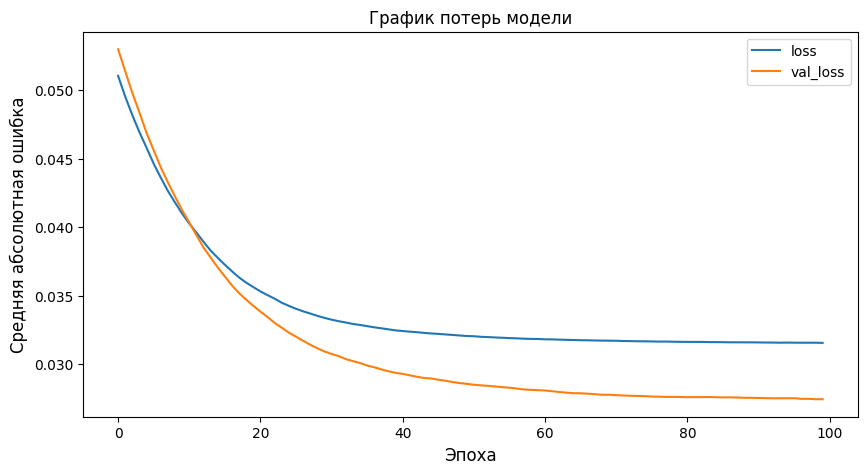

In [ ]:
model_loss_plot(history)

10/10 [==============================] - 0s 2ms/step


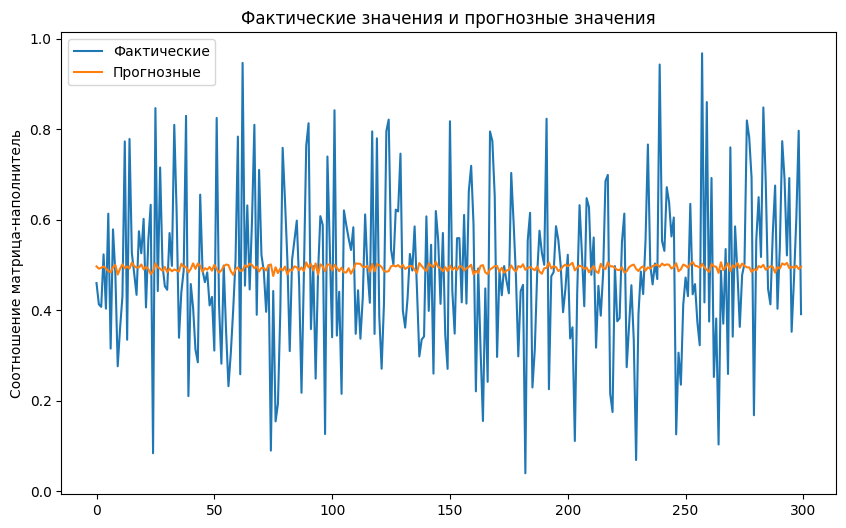

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Фактические')
plt.plot(y_pred, label='Прогнозные')
plt.ylabel('Соотношение матрица-наполнитель')
plt.title('Тестовые значения и прогнозные значения')
plt.legend()
plt.show()

10/10 [==============================] - 0s 5ms/step


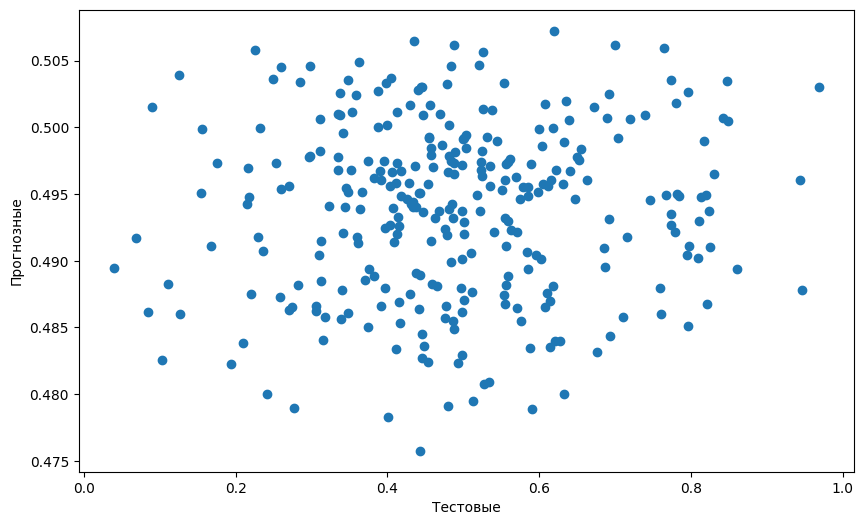

In [ ]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = y_test.values, y = y_pred)
plt.xlabel("Тестовые")
plt.ylabel("Прогнозные")

plt.show()